# Heart Disease Classification

## Overview

The data science lifecycle is designed for big data issues and the data science projects. Generally, the data science project consists of seven steps which are problem definition, data collection, data preparation, data exploration, data modeling, model evaluation and model deployment.

In this project, I will go through these steps in order to build a heart disease classifier. To build the heart disease classifier by using [UCI heart disease](https://archive.ics.uci.edu/ml/datasets/statlog+(heart)) dataset. 


## 1. Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset

In [2]:
# Import the dataset as CSV file
df = pd.read_csv('heart_disease_uci.csv')

## 3. Data Preparation

### 3-1. Data Description

In [3]:
# Preview the dataset
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


The features following are used for the prediction of heart disease presence:
1. **<font color="Black">age</font>**: age in years
2. **<font color="Black">sex</font>**:
      * 0 = Female
      * 1 = Male
3. **<font color="Black">cp</font>**: Chest pain types
      * 0 = Typical angina
      * 1 = Atypical angina
      * 2 = Non-angina pain
      * 3 = Asymptomatic
4. **<font color="Black">trestbps</font>**: Resting blood pressure (mmHg)
      * High blood pressure = 140 mmHg or above
5. **<font color="Black">chol</font>**: Serum cholestoral (mg/dL)
      * Certain elements in the blood, including low-density lipoprotein (LDL), 
           high-density lipoprotein (HDL) and triglycerides
      * Calculation = HDL + LDL + 0.2 * triglycerides
      * Higher than 200 mg/dL is concerned
6. **<font color="Black">fbs</font>**: Fasting blood sugar (> 120 mg/dL)
     * 0 = False
     * 1 = True
     * Higher than 126 mg/dL points to diabetes
7. **<font color="Black">restecg</font>**: Resting electrocardiographic results 
     * 0 = Normal
     * 1 = St-t abnormality
     * 2 = Lv hypertrophy
8. **<font color="Black">thalach</font>**: Maximum heart rate achieved (bpm) 
9. **<font color="Black">exang</font>**: Exercise induced angina
     * 0 = Negative 
     * 1 = Positive
10. **<font color="Black">oldpeak</font>**: ST depression induced by exercise relative to rest 
11. **<font color="Black">slope</font>**: The slope of the peak exercise ST segment
    * 0 = Upsloping
    * 1 = Horizontal 
    * 2 = Downsloping
12. **<font color="Black">ca</font>**: Number of major vessels (0-3) colored by fluoroscopy  
    * The colored blood vessels are passing through
    * There is a clot if the blood vessel is not colored
13. **<font color="Black">thal</font>**: Thallium scintigraphy
    * 3 = Normal
    * 6 = Fixed defect
    * 7 = Reversable defect
14. **<font color="Black">target</font>**: Heart Disease  
    * 0 = Benign 
    * 1 = Malignant

### 3-2. Data Cleaning

<AxesSubplot:>

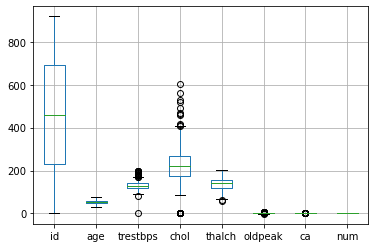

In [4]:
# Detecting the outliers using IQR and removing them
df.boxplot()

In [5]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

id          459.5
age          13.0
trestbps     20.0
chol         93.0
thalch       37.0
oldpeak       1.5
ca            1.0
num           2.0
dtype: float64


/var/folders/p7/jmf2qtps5l5_f6ynmmdtzdfc0000gn/T/ipykernel_62212/1076340735.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


<AxesSubplot:>

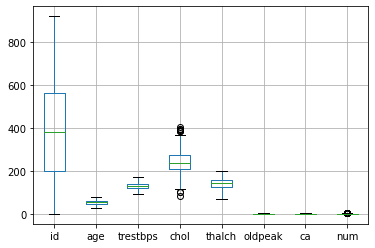

In [6]:
df.boxplot()

In [7]:
# Check out Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        688 non-null    int64  
 1   age       688 non-null    int64  
 2   sex       688 non-null    object 
 3   dataset   688 non-null    object 
 4   cp        688 non-null    object 
 5   trestbps  642 non-null    float64
 6   chol      659 non-null    float64
 7   fbs       680 non-null    object 
 8   restecg   687 non-null    object 
 9   thalch    643 non-null    float64
 10  exang     643 non-null    object 
 11  oldpeak   641 non-null    float64
 12  slope     426 non-null    object 
 13  ca        268 non-null    float64
 14  thal      315 non-null    object 
 15  num       688 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 91.4+ KB


In [8]:
# Delete rows containing either 10% or more than 10% NaN Values
perc = 10.0 
min_count =  int(((100-perc)/100)*df.shape[1] + 1)
df = df.dropna(axis=0, thresh=min_count)
df = df.reset_index()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     288 non-null    int64  
 1   id        288 non-null    int64  
 2   age       288 non-null    int64  
 3   sex       288 non-null    object 
 4   dataset   288 non-null    object 
 5   cp        288 non-null    object 
 6   trestbps  288 non-null    float64
 7   chol      288 non-null    float64
 8   fbs       288 non-null    object 
 9   restecg   288 non-null    object 
 10  thalch    288 non-null    float64
 11  exang     288 non-null    object 
 12  oldpeak   288 non-null    float64
 13  slope     288 non-null    object 
 14  ca        266 non-null    float64
 15  thal      286 non-null    object 
 16  num       288 non-null    int64  
dtypes: float64(5), int64(4), object(8)
memory usage: 38.4+ KB


In [10]:
# Mode of ca replaces null values in ca
df['ca'].fillna(df['ca'].mode()[0], inplace=True)

# Mode of thal replaces null values in thal
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     288 non-null    int64  
 1   id        288 non-null    int64  
 2   age       288 non-null    int64  
 3   sex       288 non-null    object 
 4   dataset   288 non-null    object 
 5   cp        288 non-null    object 
 6   trestbps  288 non-null    float64
 7   chol      288 non-null    float64
 8   fbs       288 non-null    object 
 9   restecg   288 non-null    object 
 10  thalch    288 non-null    float64
 11  exang     288 non-null    object 
 12  oldpeak   288 non-null    float64
 13  slope     288 non-null    object 
 14  ca        288 non-null    float64
 15  thal      288 non-null    object 
 16  num       288 non-null    int64  
dtypes: float64(5), int64(4), object(8)
memory usage: 38.4+ KB


In [11]:
# Drop multiple columns by name
df.drop(['index', 'id', 'dataset'], axis = 1, inplace = True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
2,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
3,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
4,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0


In [12]:
df = df.replace({'sex': {'Male': 1, 'Female': 0}})
df = df.replace({'cp': {'typical angina': 0, 'atypical angina': 1, 'non-anginal': 2, 'asymptomatic': 3}})
df = df.replace({'fbs': {True: 1, False:0}})
df = df.replace({'restecg': {'normal': 0, 'st-t abnormality': 1, 'lv hypertrophy': 2}})
df = df.replace({'exang': {True: 1, False: 0}})
df = df.replace({'slope': {'upsloping': 0, 'flat': 1, 'downsloping': 2}})
df = df.replace({'thal': {'normal': 3, 'fixed defect': 6, 'reversable defect': 7}})
df['target'] = df['num'].apply(lambda x: 0 if x == 0 else 1)
df = df.drop(['num'], axis=1)

# Rename origical columns
df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 
              'Cholesterol', 'Fasting_bs', 'Resting_ecg', 
              'Max_heart_rate', 'Exercise_induced_angina', 
              'ST_depression', 'ST_slope', 'Num_major_vessels',
              'Thallium_test', 'Target']
df.head()

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Target
0,63,1,0,145.0,233.0,1,2,150.0,0,2.3,2,0.0,6,0
1,67,1,3,120.0,229.0,0,2,129.0,1,2.6,1,2.0,7,1
2,37,1,2,130.0,250.0,0,0,187.0,0,3.5,2,0.0,3,0
3,41,0,1,130.0,204.0,0,2,172.0,0,1.4,0,0.0,3,0
4,56,1,1,120.0,236.0,0,0,178.0,0,0.8,0,0.0,3,0


## 4. Exploratory Data Analysis (EDA)

### Attributes Correlation

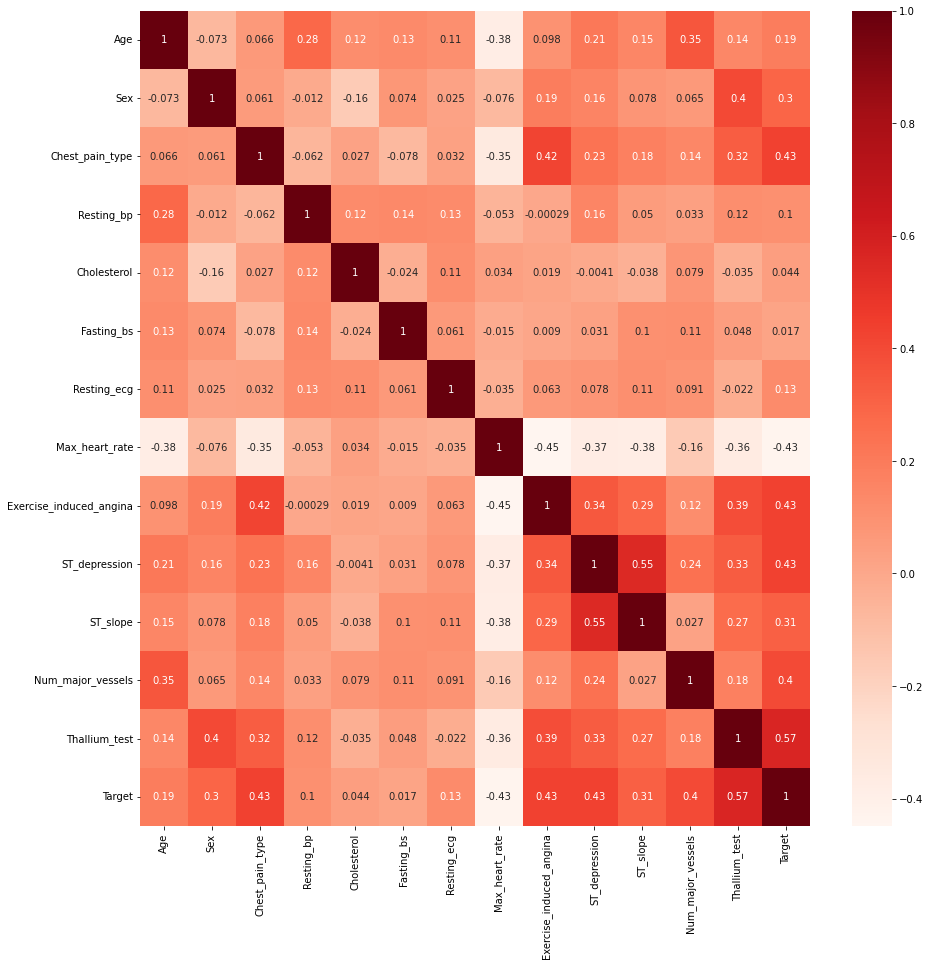

In [13]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "Reds")
plt.show()

### Age Exploration

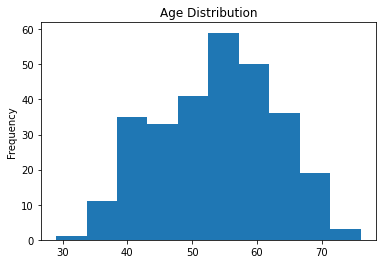

In [14]:
# Display age distribution
df['Age'].plot(kind = 'hist', title = 'Age Distribution')
plt.show()

In [15]:
# Get min, max and average of the age
print('Min age: ', min(df['Age']))
print('Max age: ', max(df['Age']))
print('Average age: ', df['Age'].mean())

Min age:  29
Max age:  76
Average age:  53.736111111111114


/Users/nick_zhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nick_zhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


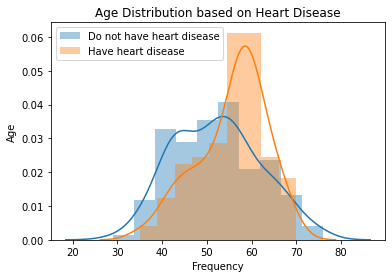

In [16]:
# Display age distribution based on heart disease
sns.distplot(df[df['Target'] == 0]['Age'], label='Do not have heart disease')
sns.distplot(df[df['Target'] == 1]['Age'], label = 'Have heart disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()

In [17]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(df[df['Target'] == 0]['Age']))
print('Max age of people who do not have heart disease: ', max(df[df['Target'] == 0]['Age']))
print('Average age of people who do not have heart disease: ', df[df['Target'] == 0]['Age'].mean())

Min age of people who do not have heart disease:  29
Max age of people who do not have heart disease:  76
Average age of people who do not have heart disease:  52.21604938271605


In [18]:
# Get min, max and average of the age of the people have heart diseas
print('Min age of people who have heart disease: ', min(df[df['Target'] == 1]['Age']))
print('Max age of people who have heart disease: ', max(df[df['Target'] == 1]['Age']))
print('Average age of people who have heart disease: ', df[df['Target'] == 1]['Age'].mean())

Min age of people who have heart disease:  35
Max age of people who have heart disease:  70
Average age of people who have heart disease:  55.69047619047619


**Note:**

We can say that the heart disease infects the old and young people, and the probability of the old people te be infected is higher than young people.  


### Gender Exploration

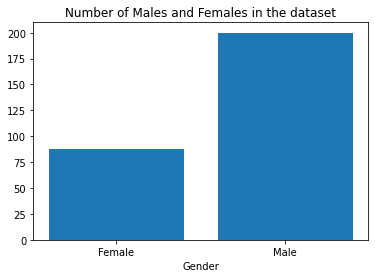

In [19]:
# Number of males and females
F = len(df[df['Sex'] == 0])
M = len(df[df['Sex'] == 1])

# Create a plot
figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x = ['Female', 'Male'], height = [F, M])
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')
plt.show()

### Chest Pain Type Exploration

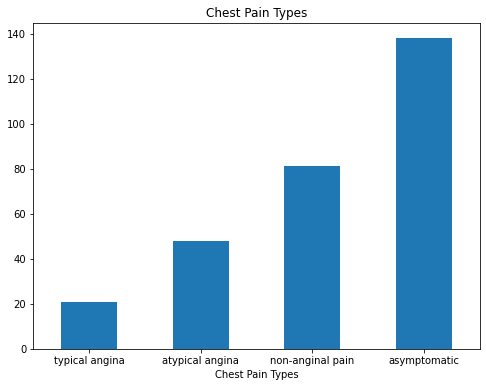

In [20]:
# Display chest pain types in bar chart
df.groupby(df['Chest_pain_type']).size().plot(kind = 'bar', title = 'Chest Pain Types', figsize = (8, 6))
plt.xlabel('Chest Pain Types')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.show()

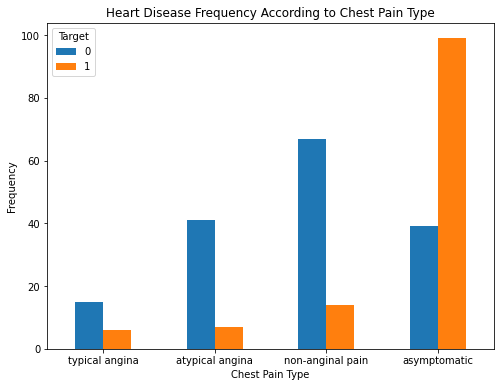

In [21]:
# Display chest pain types based on the target
pd.crosstab(df.Chest_pain_type,df.Target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

We can see that most of the people with heart disease have asymptomatic chest pain.

### Blood Pressure Exploration 

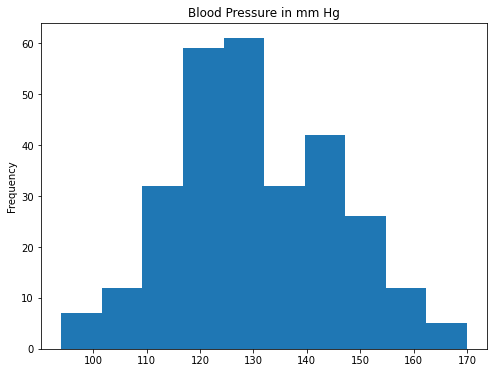

In [22]:
# Display blood pressure distribution
df['Resting_bp'].plot(kind = 'hist', title = 'Blood Pressure in mm Hg', figsize = (8, 6))
plt.show()

/Users/nick_zhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nick_zhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


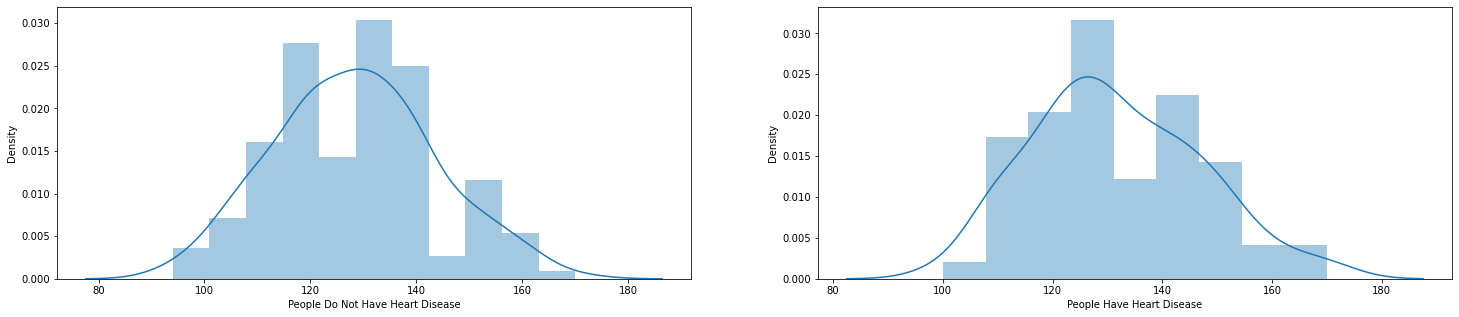

In [23]:
# Display blood pressure distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(df[df['Target'] == 0]['Resting_bp'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['Target'] == 1]['Resting_bp'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [24]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who do not have heart disease: ', min(df[df['Target'] == 0]['Resting_bp']))
print('Max blood pressure of people who do not have heart disease: ', max(df[df['Target'] == 0]['Resting_bp']))
print('Average blood pressure of people who do not have heart disease: ', df[df['Target'] == 0]['Resting_bp'].mean())

Min blood pressure of people who do not have heart disease:  94.0
Max blood pressure of people who do not have heart disease:  170.0
Average blood pressure of people who do not have heart disease:  128.41975308641975


In [25]:
# Get min, max and average of the blood pressure of the people have heart diseas
print('Min blood pressure of people who have heart disease: ', min(df[df['Target'] == 1]['Resting_bp']))
print('Max blood pressure of people who have heart disease: ', max(df[df['Target'] == 1]['Resting_bp']))
print('Average blood pressure of people who have heart disease: ', df[df['Target'] == 1]['Resting_bp'].mean())

Min blood pressure of people who have heart disease:  100.0
Max blood pressure of people who have heart disease:  170.0
Average blood pressure of people who have heart disease:  131.5793650793651


### Cholestoral Exploration 

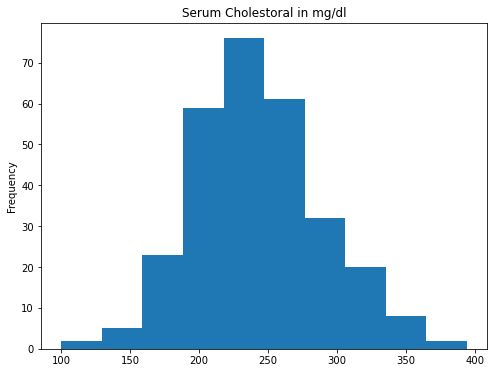

In [26]:
# Display Cholestoral distribution
df['Cholesterol'].plot(kind = 'hist', title = 'Serum Cholestoral in mg/dl', figsize = (8, 6))
plt.show()

/Users/nick_zhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nick_zhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


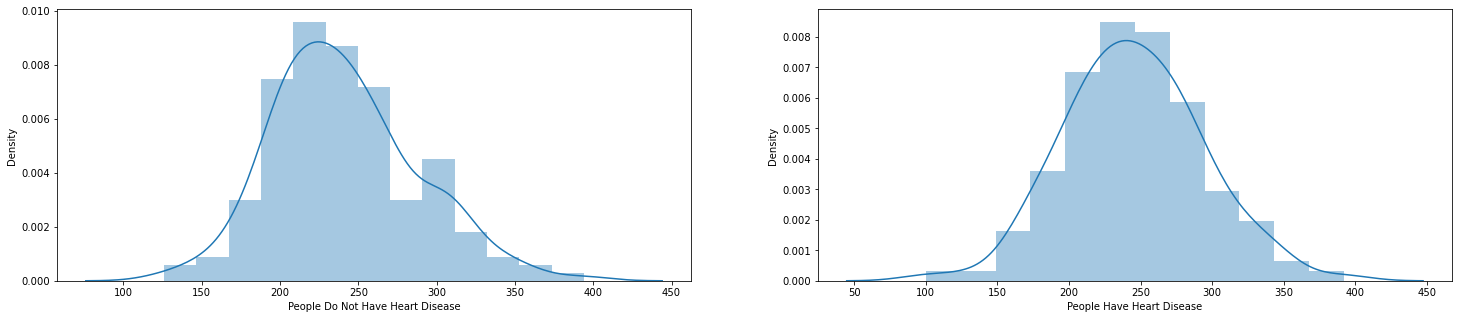

In [27]:
# Display Cholestoral distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['Target'] == 0]['Cholesterol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['Target'] == 1]['Cholesterol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [28]:
# Get min, max and average of the Cholestoral of the people do not have heart diseas
print('Min cholestoral of people who do not have heart disease: ', min(df[df['Target'] == 0]['Cholesterol']))
print('Max cholestoral of people who do not have heart disease: ', max(df[df['Target'] == 0]['Cholesterol']))
print('Average cholestoral of people who do not have heart disease: ', df[df['Target'] == 0]['Cholesterol'].mean())

Min cholestoral of people who do not have heart disease:  126.0
Max cholestoral of people who do not have heart disease:  394.0
Average cholestoral of people who do not have heart disease:  240.92592592592592


In [29]:
# Get min, max and average of the Cholestoral of the people have heart diseas
print('Min cholestoral of people who have heart disease: ', min(df[df['Target'] == 1]['Cholesterol']))
print('Max cholestoral of people who have heart disease: ', max(df[df['Target'] == 1]['Cholesterol']))
print('Average cholestorale of people who have heart disease: ', df[df['Target'] == 1]['Cholesterol'].mean())

Min cholestoral of people who have heart disease:  100.0
Max cholestoral of people who have heart disease:  392.0
Average cholestorale of people who have heart disease:  245.05555555555554


### Fasting Blood Sugar  Exploration 

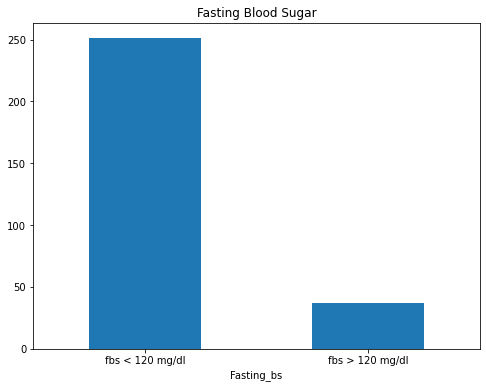

In [30]:
# Display fasting blood sugar in bar chart
df.groupby(df['Fasting_bs']).size().plot(kind = 'bar', title = 'Fasting Blood Sugar', figsize = (8, 6))
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.show()

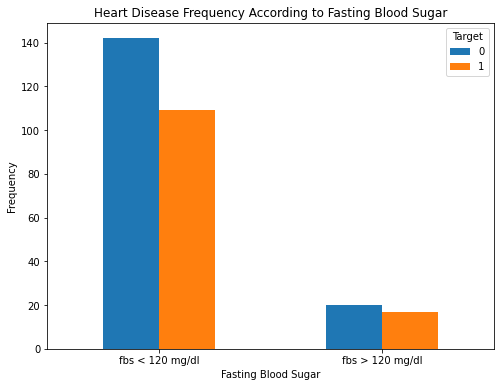

In [31]:
# Display fasting blood sugar based on the target
pd.crosstab(df.Fasting_bs,df.Target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

###  Electrocardiographic Results Exploration

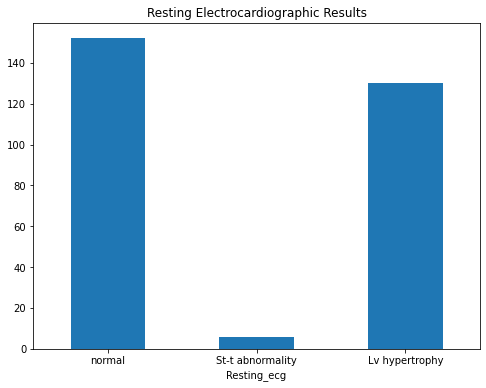

In [32]:
# Display electrocardiographic results in bar chart
df.groupby(df['Resting_ecg']).size().plot(kind = 'bar', title = 'Resting Electrocardiographic Results', figsize = (8, 6))
plt.xticks(np.arange(3), ('normal', 'St-t abnormality', 'Lv hypertrophy'), rotation = 0)
plt.show()

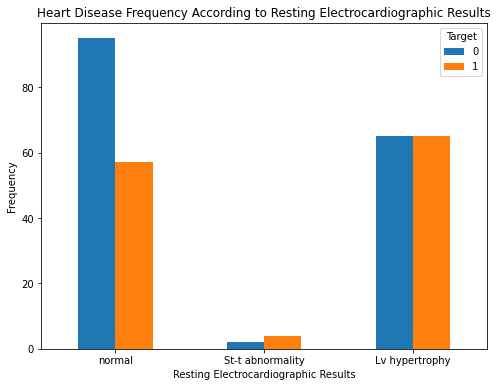

In [33]:
# Display resting electrocardiographic results based on the target
pd.crosstab(df.Resting_ecg,df.Target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'St-t abnormality', 'Lv hypertrophy'), rotation = 0)
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()

**Note:**

Usually the people who do not have heart disease have normal electrocardiographic.

### Maximum Heart Rate Exploration

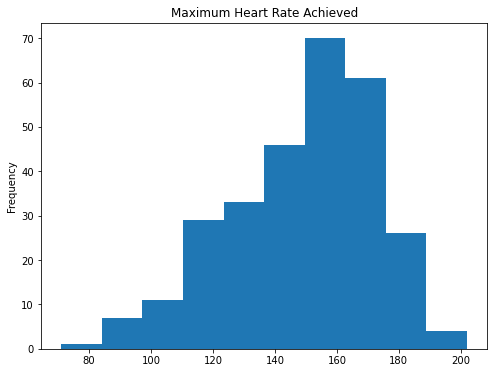

In [34]:
# Display maximum heart rate distribution
df['Max_heart_rate'].plot(kind = 'hist', title = 'Maximum Heart Rate Achieved', figsize = (8, 6))
plt.show()

/Users/nick_zhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nick_zhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


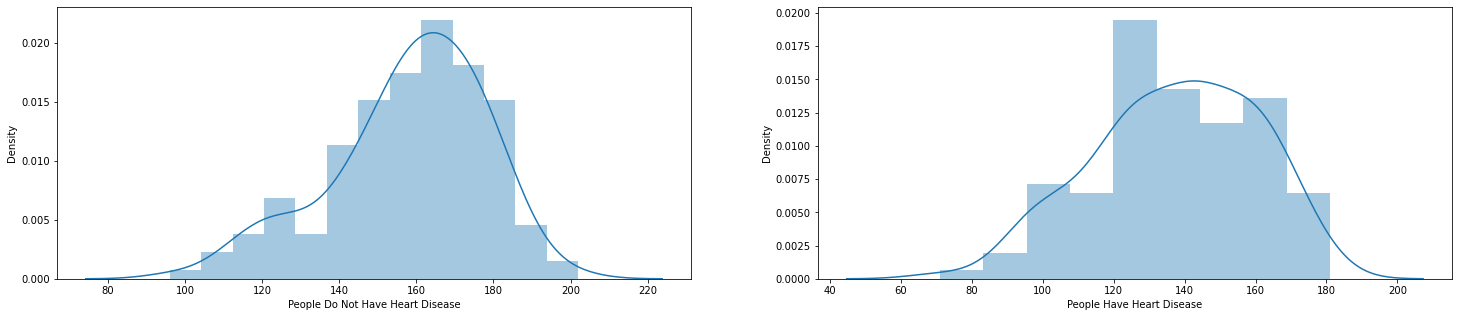

In [35]:
# Display maximum heart rate distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['Target'] == 0]['Max_heart_rate'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(df[df['Target'] == 1]['Max_heart_rate'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [36]:
# Get min, max and average of the maximum heart rate of the people do not have heart diseas
print('Min resting blood pressure of people who do not have heart disease: ', min(df[df['Target'] == 0]['Max_heart_rate']))
print('Max resting blood pressure of people who do not have heart disease: ', max(df[df['Target'] == 0]['Max_heart_rate']))
print('Average resting blood pressure of people who do not have heart disease: ', df[df['Target'] == 0]['Max_heart_rate'].mean())

Min resting blood pressure of people who do not have heart disease:  96.0
Max resting blood pressure of people who do not have heart disease:  202.0
Average resting blood pressure of people who do not have heart disease:  157.89506172839506


In [37]:
# Get min, max and average of the maximum heart rate of the people have heart diseas
print('Min maximum heart rate  of people who have heart disease: ', min(df[df['Target'] == 1]['Max_heart_rate']))
print('Max maximum heart rate people who have heart disease: ', max(df[df['Target'] == 1]['Max_heart_rate']))
print('Average maximum heart rate of people who have heart disease: ', df[df['Target'] == 1]['Max_heart_rate'].mean())

Min maximum heart rate  of people who have heart disease:  71.0
Max maximum heart rate people who have heart disease:  181.0
Average maximum heart rate of people who have heart disease:  137.29365079365078


### Exercise Induced Angina Exploration

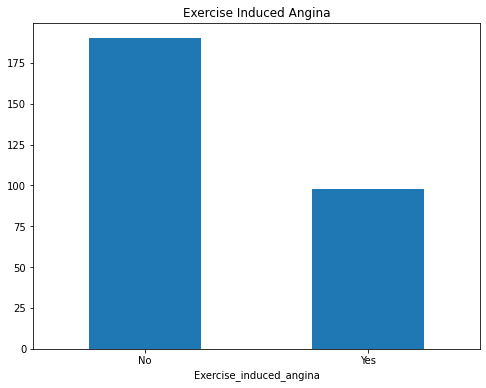

In [38]:
# Display exercise induced angina in bar chart
df.groupby(df['Exercise_induced_angina']).size().plot(kind = 'bar', title = 'Exercise Induced Angina',  figsize = (8, 6))
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.show()

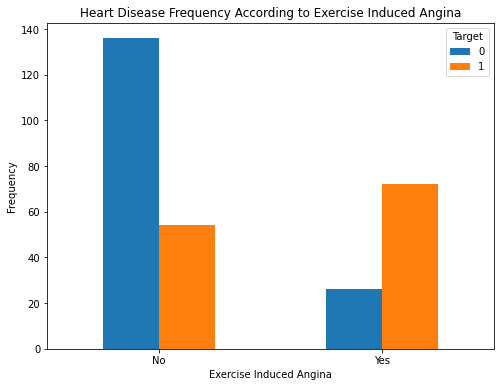

In [39]:
# Display exercise induced angina based on the target
pd.crosstab(df.Exercise_induced_angina,df.Target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

The people who suffer from exercise induced angina are more likely to likely to be infected with the heart disease.

### ST depression Exploration

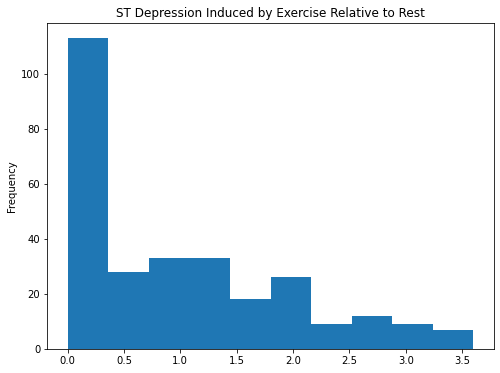

In [40]:
# Display ST depression induced by exercise relative to rest distribution
df['ST_depression'].plot(kind = 'hist', title = 'ST Depression Induced by Exercise Relative to Rest', figsize = (8, 6))
plt.show()

/Users/nick_zhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nick_zhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


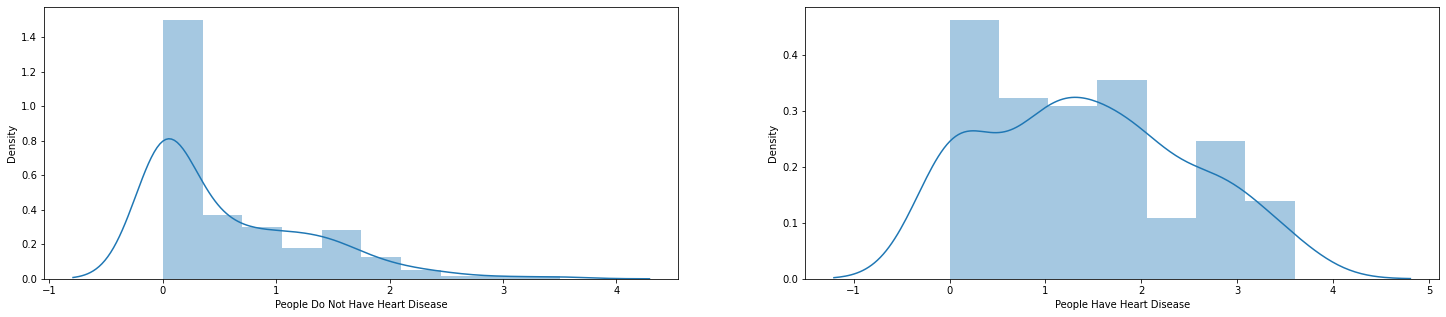

In [41]:
# Display ST depression distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['Target'] == 0]['ST_depression'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(df[df['Target'] == 1]['ST_depression'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [42]:
# Get min, max and average of the ST depression  of the people  do not have heart diseas
print('Min ST depression of people who do not have heart disease: ', min(df[df['Target'] == 0]['ST_depression']))
print('Max ST depression of people who do not have heart disease: ', max(df[df['Target'] == 0]['ST_depression']))
print('Average ST depression of people who do not have heart disease: ', df[df['Target'] == 0]['ST_depression'].mean())

Min ST depression of people who do not have heart disease:  0.0
Max ST depression of people who do not have heart disease:  3.5
Average ST depression of people who do not have heart disease:  0.5814814814814814


In [43]:
# Get min, max and average of the ST depression of the people have heart diseas
print('Min ST depression of people who have heart disease: ', min(df[df['Target'] == 1]['ST_depression']))
print('Max ST depression of people who have heart disease: ', max(df[df['Target'] == 1]['ST_depression']))
print('Average ST depression of people not have heart disease: ', df[df['Target'] == 1]['ST_depression'].mean())

Min ST depression of people who have heart disease:  0.0
Max ST depression of people who have heart disease:  3.6
Average ST depression of people not have heart disease:  1.4357142857142857


### Slope Exploration

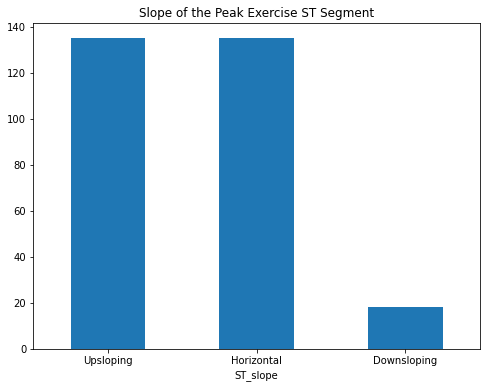

In [44]:
# Display slope of the peak exercise ST segment in bar chart
df.groupby(df['ST_slope']).size().plot(kind = 'bar', title = 'Slope of the Peak Exercise ST Segment', figsize = (8, 6))
plt.xticks(np.arange(3), ('Upsloping', 'Horizontal', 'Downsloping'), rotation = 0)
plt.show()

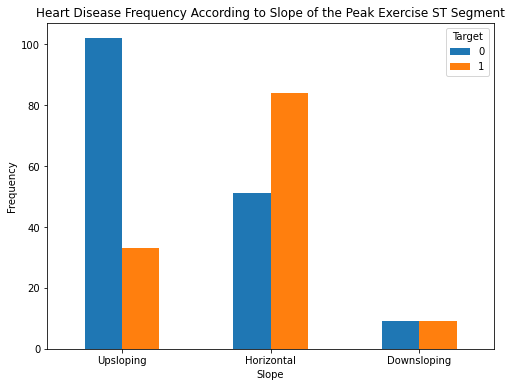

In [45]:
# Display slope of the peak exercise ST segment based on the target
pd.crosstab(df.ST_slope,df.Target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Slope of the Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.xticks(np.arange(3), ('Upsloping', 'Horizontal', 'Downsloping'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

As it is clear, the people with horizontal peak ST segment are likely to have heart disease and usually the people who do not have heart disease have upsloping peak ST segment.

### Major Vessels Exploration

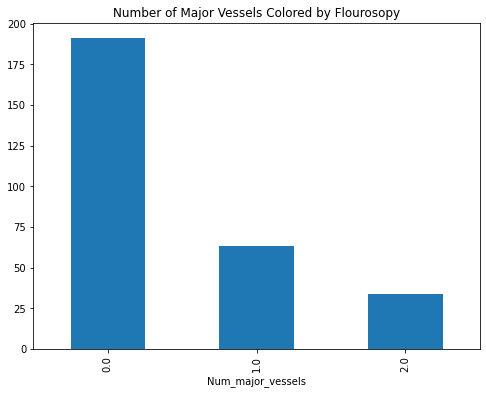

In [46]:
# Display number of major vessels in bar chart
df.groupby(df['Num_major_vessels']).size().plot(kind = 'bar', title = 'Number of Major Vessels Colored by Flourosopy', 
                                            figsize = (8, 6))
plt.show()

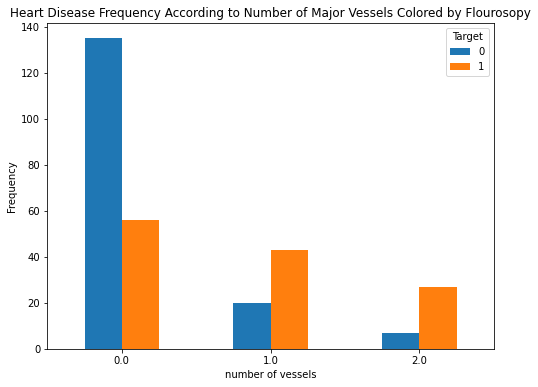

In [47]:
# Display number of vessels based on the target
pd.crosstab(df.Num_major_vessels,df.Target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Number of Major Vessels Colored by Flourosopy')
plt.xlabel('number of vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

As it is clear, the people who do not have heart disease usually do not have major vessels colored by flourosopy.

### Thalassemia Exploration

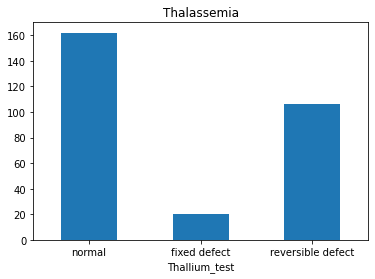

In [48]:
# Display thalassemia in bar chart
df.groupby(df['Thallium_test']).size().plot(kind = 'bar', title = 'Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.show()

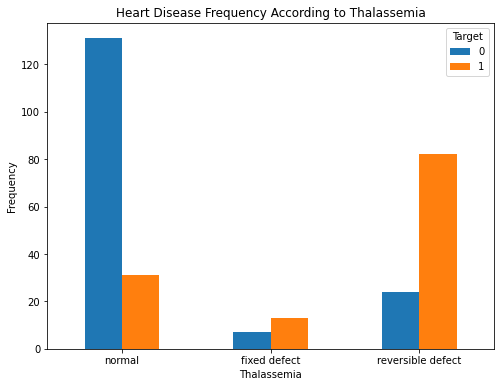

In [49]:
pd.crosstab(df.Thallium_test,df.Target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Thalassemia')
plt.xlabel('Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

As it is clear, the people with reversible defect are likely to have heart disease.

### Observations from the above PDFs and CDFs (Consider the example of Age) :

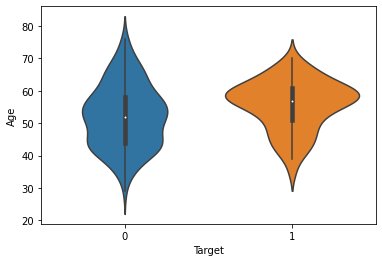

In [50]:
#Violin Plots for Age
sns.violinplot(x = "Target", y = "Age", data = df, size = 8)
plt.show()

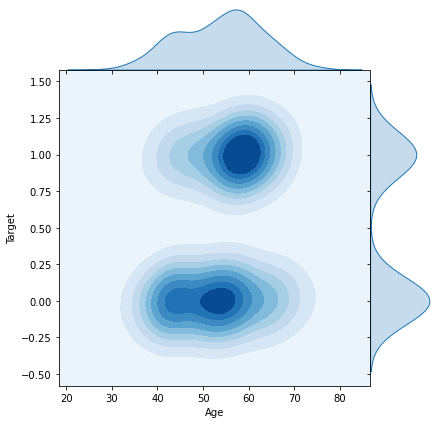

In [51]:
sns.jointplot(data=df, x="Age",y="Target", kind="kde", space=0, fill=True, thresh=0, cmap='Blues')
plt.show()